## Loading Dataset

In [1]:
from PIL import Image
import os
import cv2
import numpy as np

# Directory containing images with unusual extensions
data_dir = 'YaleFaces/'

# Function to read images with unusual extensions and convert to OpenCV format
def read_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.startswith('subject'):  # Adjust the extension as per your dataset
            filepath = os.path.join(directory, filename)
            with Image.open(filepath) as img:
                # Convert image to numpy array
                np_image = np.array(img)
                # If image has alpha channel, remove it
                if np_image.shape[-1] == 4:
                    np_image = np_image[:, :, :3]
                # Convert image to BGR format (OpenCV uses BGR instead of RGB)
                bgr_image = cv2.cvtColor(np_image, cv2.COLOR_RGB2BGR)
                images.append(bgr_image)
    return images

# Read images from the specified directory
images = read_images(data_dir)

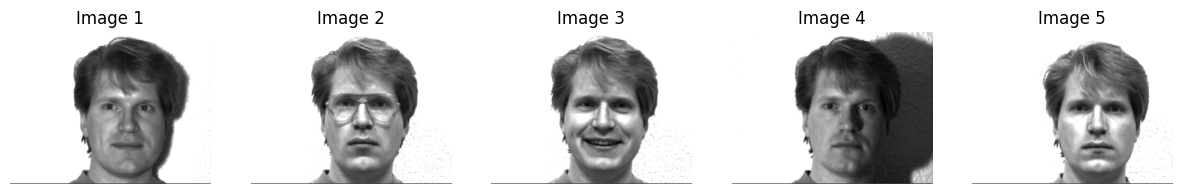

In [2]:
from matplotlib import pyplot as plt

# Display the first 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(min(5, len(images))):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")
plt.show()

## Face Detection Using MTCNN

In [4]:
import cv2
import mtcnn
import numpy as np
import matplotlib.pyplot as plt

# Create a detector
detector = mtcnn.MTCNN()

# Detect faces in a single image
def detect_face(image):
    # Detect faces in the image
    result = detector.detect_faces(image)
    # If no face is detected, return an empty list
    if len(result) == 0:
        return []
    # Extract the bounding box of the face
    x1, y1, width, height = result[0]['box']
    # Extract the face
    x1, y1, width, height = int(x1), int(y1), int(width), int(height)
    face = image[y1:y1+height, x1:x1+width]
    
    # Resize the face to a fixed size
    face = cv2.resize(face, (160, 160))
    return face

# Get faces and resize the images to a fixed size
def get_faces(images):
    return [detect_face(image) for image in images]

# Assuming 'images' is a list of images
faces = get_faces(images)

# Display the first detected face
if faces:
    plt.imshow(cv2.cvtColor(faces[0], cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("No face detected in the image.")


ModuleNotFoundError: No module named 'tensorflow'